In [37]:
import requests
import nltk, re, pprint, io, json
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import pickle

In [54]:
# Load TDIDF scores
#tfidf_repub = np.load("tdidf_repub_2.npy")
#tfidf_demo = np.load("tfidf_demo_2.npy")

tfidf_repub = np.load("tdidf_repub_2.npy")
tfidf_demo = np.load("tfidf_demo_2.npy")

# Load terms in most common order
file = open("most_common_repub.obj",'rb')
most_common_repub = pickle.load(file)
file.close()

file = open("most_common_demo.obj",'rb')
most_common_demo = pickle.load(file)
file.close()

* Combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value).

In [55]:
# Round scores
rounded_repub = np.array(tfidf_repub, dtype="int32")
rounded_demo = np.array(tfidf_demo, dtype="int32")

In [56]:
repub_wc_string = ""
for w,n in zip(most_common_repub, rounded_repub):
    repub_wc_string += (w + " ") * n

In [57]:
demo_wc_string = ""
for w,n in zip(most_common_demo, rounded_demo):
    demo_wc_string += (w + " ") * n

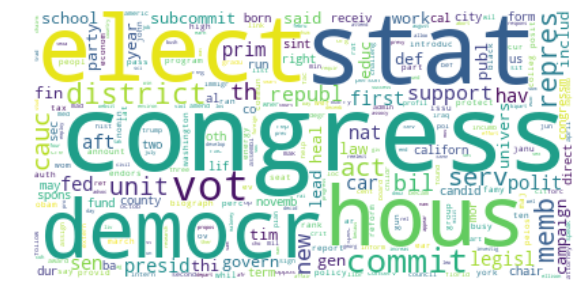

In [72]:
repub_wc = WordCloud(
    background_color="white", 
    max_words=4000, contour_width=3, 
    contour_color='steelblue', 
    collocations=False
).generate(repub_wc_string)

plt.figure(figsize=[10,5])
plt.imshow(demo_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

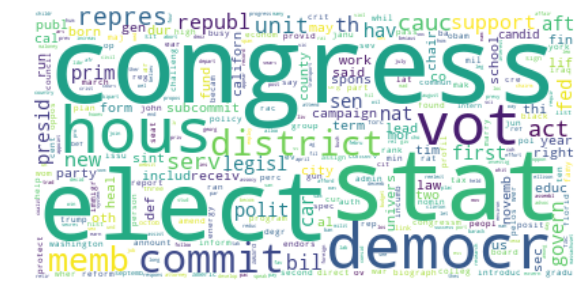

In [73]:
demo_wc = WordCloud(
    background_color="white", 
    max_words=4000, contour_width=3, 
    contour_color='steelblue', 
    collocations=False
).generate(demo_wc_string)

plt.figure(figsize=[10,5])
plt.imshow(demo_wc, interpolation='bilinear')
plt.axis("off")
plt.show()